# Train and Evaluate Model

In [1]:
# Import packages
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

tf.__version__ # 2.x

'2.3.0'

## Model

In [2]:
# Sequence model
seq_model = tf.keras.Sequential()
seq_model.add(tf.keras.Input(shape=(784,), name="input_x"))
seq_model.add(layers.Dense(64, activation="relu", name="dense_1"))
seq_model.add(layers.Dense(64, activation="relu", name="dense_2"))
seq_model.add(layers.Dense(10, activation="softmax", name="y"))

# View
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
y (Dense)                    (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Functional model
inputs = tf.keras.Input(shape=(784,), name="x")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
y = layers.Dense(10, activation="softmax", name="y")(x)

# Wrap layers into a model object
func_model = tf.keras.Model(inputs=inputs, outputs=y)

# View
func_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
y (Dense)                    (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


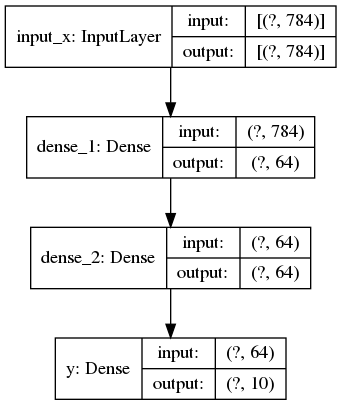

In [4]:
# Plot sequence model
tf.keras.utils.plot_model(seq_model, "/tmp/seq_model.png", show_shapes=True, show_layer_names=True)

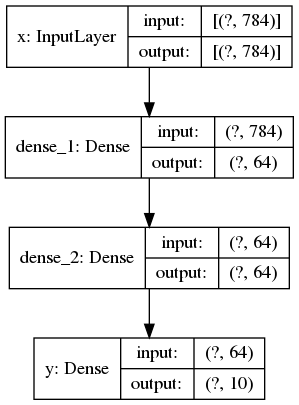

In [5]:
# Plot functional model
tf.keras.utils.plot_model(func_model, "/tmp/func_model.png", show_shapes=True, show_layer_names=True)

## Train and Evaluate

Typical end-to-end workflow consists of:

- Training
- Validation on a holdout set generated from the original training data
- Evaluation on the test data

We'll use very famous MNIST data to solve a digit image classification problem.
Both models, sequence and functonal models can be used in a similar manner.

In [6]:
# Load data into memory
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape to a vector from matrix of 28*28 and normalize it
x_train = x_train.reshape(60000, 784).astype("float32") / 255
y_train = y_train.astype("float32")

x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_test = y_test.astype("float32")

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)
print("Validate:", x_val.shape, y_val.shape)

Train: (48000, 784) (48000,)
Test: (10000, 784) (10000,)
Validate: (12000, 784) (12000,)


Specify the training configuration (optimizer, loss, metrics) using `compile()`

In [7]:
# Compile model
seq_model.compile(
    # Model optimizer
    optimizer = tf.keras.optimizers.RMSprop(),
    
    # Model loss function
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    
    # Model performance metric
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [8]:
# Model training
history = seq_model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_val, y_val),
)

Epoch 1/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3430 - sparse_categorical_accuracy: 0.9022 - val_loss: 0.2055 - val_sparse_categorical_accuracy: 0.9396
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.1590 - sparse_categorical_accuracy: 0.9536 - val_loss: 0.1504 - val_sparse_categorical_accuracy: 0.9551
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1160 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1186 - val_sparse_categorical_accuracy: 0.9648
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0928 - sparse_categorical_accuracy: 0.9723 - val_loss: 0.1242 - val_sparse_categorical_accuracy: 0.9632
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.1102 - val_sparse_categorical_accuracy: 0.9670
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0669 - sparse_categorica

Evaluate model on the test dataset using `evaluate()`

In [9]:
results = seq_model.evaluate(x_test, y_test, batch_size=128)
print("Test loss, Test acc:", results)

79/79 [==============================] - 0s 957us/step - loss: 0.1034 - sparse_categorical_accuracy: 0.9715
Test loss, Test acc: [0.10335808247327805, 0.9714999794960022]


Generate predictions (probabilities) on test set using `predict()`

In [10]:
predictions = seq_model.predict(x_test)
print("Predictions:", predictions.shape)
print("First prediction:", predictions[0])

Predictions: (10000, 10)
First prediction: [4.40050635e-11 1.01672412e-11 5.39843334e-08 5.64973516e-06
 4.36260050e-14 1.27848609e-09 1.12862789e-17 9.99993801e-01
 1.08995355e-08 5.14923443e-07]
